In [161]:
import pandas as pd
import seaborn as sns

In [162]:
df = pd.read_csv("car_data.csv")

In [163]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [164]:
df.shape

(1000, 5)

In [165]:
df.info

<bound method DataFrame.info of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [166]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [167]:
df.duplicated().sum()

0

In [168]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [169]:
df = df.drop("User ID", axis = "columns")

In [170]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [171]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [172]:
df["Gender"].value_counts()

Gender
Female    516
Male      484
Name: count, dtype: int64

In [173]:
df["Purchased"].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

D:\Python2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AnnualSalary', ylabel='Count'>

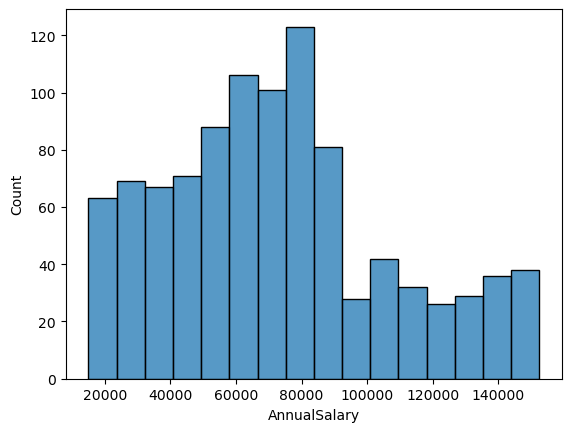

In [174]:
sns.histplot(x = "AnnualSalary", data = df)

D:\Python2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AnnualSalary', ylabel='Count'>

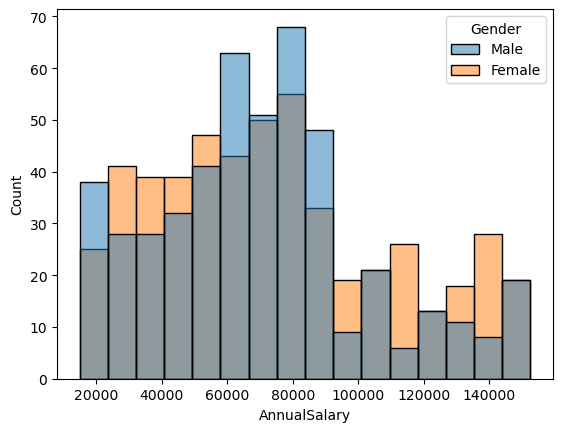

In [175]:
sns.histplot(x = "AnnualSalary", data = df, hue="Gender")

D:\Python2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

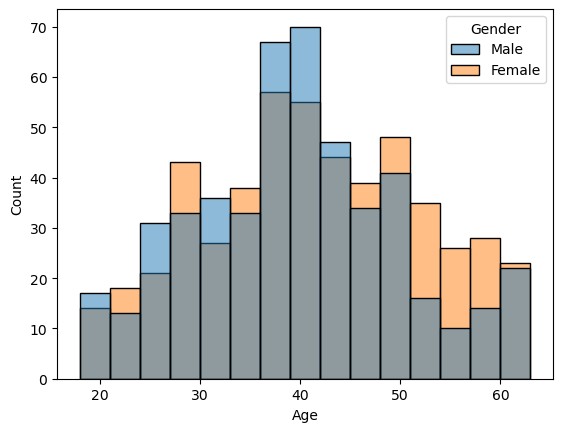

In [176]:
sns.histplot(x= "Age", data = df, hue="Gender")

D:\Python2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AnnualSalary', ylabel='Count'>

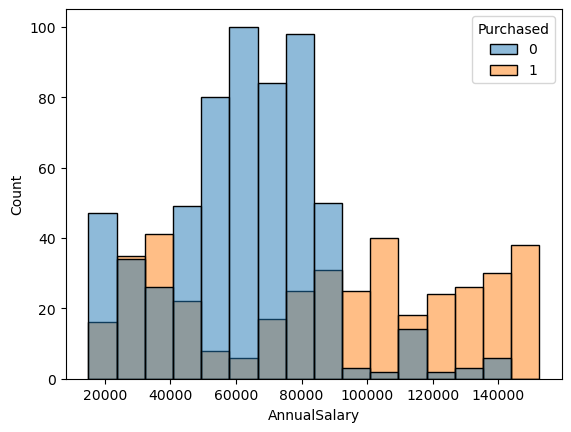

In [177]:
sns.histplot(x= "AnnualSalary", data = df, hue="Purchased")

D:\Python2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

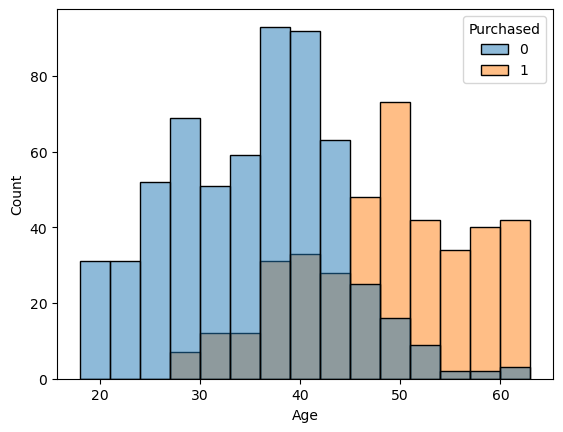

In [178]:
sns.histplot(x= "Age", data = df, hue="Purchased")

In [179]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [180]:
df1 = df

In [181]:
df = df.drop("Gender",axis = "columns")

In [182]:
df.corr()

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


In [183]:
df.corr()["Purchased"].sort_values()

AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

In [184]:
df1 = pd.get_dummies(df1,drop_first=False)

In [185]:
df1.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,False,True
1,40,43500,0,False,True
2,49,74000,0,False,True
3,40,107500,1,False,True
4,25,79000,0,False,True


In [186]:
df1 = df1.drop("Gender_Male",axis="columns")

In [187]:
x = df1[["AnnualSalary","Age","Gender_Female"]].copy()

In [188]:
y = df1[["Purchased"]].copy()

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))

In [193]:
### ML ###

In [194]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train.values.ravel())
log_predictions = log_model.predict(scaled_x_test)
modelperformance(log_predictions)

Accuracy score in model is 0.8333333333333334


In [195]:
from sklearn.neighbors import KNeighborsClassifier
test_errors = []
for k in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train.values.ravel())
    knn_pred = knn_model.predict(scaled_x_test)
    test_error_rate = 1 - accuracy_score(y_test,knn_pred)
    test_errors.append(test_error_rate)

In [196]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'K Neighbors')

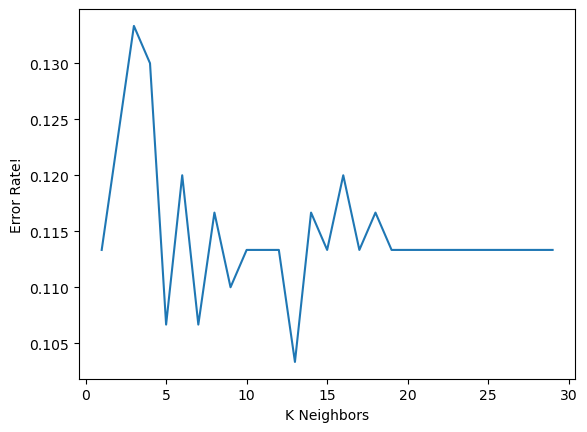

In [197]:
plt.plot(range(1,30),test_errors)
plt.ylabel("Error Rate!")
plt.xlabel("K Neighbors")

In [198]:
knn_elbowmethod = KNeighborsClassifier(n_neighbors = 12)
knn_elbowmethod.fit(scaled_x_train,y_train.values.ravel())
knn_pred = knn_model.predict(scaled_x_test)
modelperformance(knn_pred)

Accuracy score in model is 0.8866666666666667


In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [('knn',knn)])
param_grid = {'knn__n_neighbors':k_values}
cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")

In [200]:
cv_classifier.fit(scaled_x_train,y_train.values.ravel())
print(cv_classifier.best_params_)

{'knn__n_neighbors': 21}


In [201]:
pred_gridknn = cv_classifier.predict(scaled_x_test)
modelperformance(pred_gridknn)

Accuracy score in model is 0.8866666666666667


In [202]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {"C":[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly']}
gridsvr = GridSearchCV(svm,param_grid_svr)

In [203]:
gridsvr.fit(scaled_x_train,y_train.values.ravel())
pred_svr = gridsvr.predict(scaled_x_test)
modelperformance(pred_svr)

Accuracy score in model is 0.8866666666666667


In [204]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(scaled_x_train,y_train.values.ravel())

DecisionTreeClassifier()

In [205]:
treepred = treemodel.predict(scaled_x_test)
modelperformance(treepred)

Accuracy score in model is 0.9033333333333333


In [206]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32,64,128,256]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
param_grid_rfr={'n_estimators':n_estimators,
               'max_features':max_features,
               'bootstrap':bootstrap,
               'oob_score':oob_score}

gridrfr = GridSearchCV(rfr_model,param_grid_rfr)
gridrfr.fit(scaled_x_train,y_train.values.ravel())

D:\Python2024\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python2024\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python2024\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
D:\Python2024\Lib\site-packages\sklea

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [207]:
print(gridrfr.best_params_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}


In [208]:
rfc = RandomForestClassifier(max_features = 2,
                            n_estimators = 64,
                            bootstrap = True,
                            oob_score = False)

In [209]:
rfc.fit(scaled_x_train,y_train.values.ravel())
predsrfc = rfc.predict(scaled_x_test)
modelperformance(predsrfc)

Accuracy score in model is 0.8933333333333333


In [210]:
### BEST MODEL ###

# The k-Nearest Neighbors (kNN) Algorithm <- 0.90666666666666